# 1-1. Object Detection Demo
## 이미지에 보이는 오브젝트 인식

In [2]:
%pip install google-cloud-vision --user
%pip install pillow --user

### Authentication

In [1]:
from google.oauth2.service_account import Credentials
credentials = Credentials.from_service_account_file('auth.json')

### Cloud Vision API call
#### https://cloud.google.com/vision/docs/object-localizer

In [2]:
from PIL import Image, ImageDraw

def draw_line(image, x1, y1, x2, y2, color="lime", width=2):
    draw = ImageDraw.Draw(image)
    draw.line((x1, y1, x2, y2), fill=color, width=width)
    #print (f"{x1},{y1} -> {x2}, {y2}")

    return image

from google.cloud import vision
def localize_objects(path):
    """Localize objects in the local image.

    Args:
    path: The path to the local file.
    """
    output_image = Image.open(path)
    width, height = output_image.size
    client = vision.ImageAnnotatorClient(credentials=credentials)

    with open(path, "rb") as image_file:
        content = image_file.read()
    image = vision.Image(content=content)

    objects = client.object_localization(image=image).localized_object_annotations

    print(f"Number of objects found: {len(objects)}")
    for object_ in objects:
        print(f"{object_.name} (confidence: {round(object_.score,2)})")
        #print("Normalized bounding polygon vertices: ")
        cnt = 0
        start_x = 0
        start_y = 0
        for vertex in object_.bounding_poly.normalized_vertices:
            print(f" - ({vertex.x}, {vertex.y})")
            if (cnt > 0):
                output_image = draw_line(output_image,
                                         start_x*width, start_y*height,
                                         vertex.x*width, vertex.y*height)
            else:
                init_x = vertex.x
                init_y = vertex.y
            cnt = cnt + 1
            start_x = vertex.x
            start_y = vertex.y

        output_image = draw_line(output_image,
                                         start_x*width, start_y*height,
                                         init_x*width, init_y*height)

    return output_image

def detect_logos(path):
    """Detects logos in the file."""
    from google.cloud import vision

    client = vision.ImageAnnotatorClient(credentials=credentials)

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.logo_detection(image=image)
    print(response)
    logos = response.logo_annotations
    print("Logos:")

    for logo in logos:
        print(logo.description)

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )

def detect_labels(path):
    """Detects labels in the file."""
    from google.cloud import vision

    client = vision.ImageAnnotatorClient(credentials=credentials)

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    print(response)
    labels = response.label_annotations
    print("Labels:")

    for label in labels:
        print(label.description)

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )


### image sample - 01
#### [29cm] 다용도 식도 주방 칼
#### https://product.29cm.co.kr/catalog/2338303?category_large_code=292100100

Number of objects found: 6
Kitchen knife (confidence: 0.85)
 - (0.140625, 0.234375)
 - (0.94921875, 0.234375)
 - (0.94921875, 0.6796875)
 - (0.140625, 0.6796875)
Cutting board (confidence: 0.82)
 - (0.0004520416259765625, 0.55078125)
 - (1.0, 0.55078125)
 - (1.0, 1.0)
 - (0.0004520416259765625, 1.0)
Knife (confidence: 0.73)
 - (0.140625, 0.234375)
 - (0.94921875, 0.234375)
 - (0.94921875, 0.6796875)
 - (0.140625, 0.6796875)
Tomato (confidence: 0.71)
 - (0.337890625, 0.52734375)
 - (0.61328125, 0.52734375)
 - (0.61328125, 0.76171875)
 - (0.337890625, 0.76171875)
Tomato (confidence: 0.58)
 - (0.6171875, 0.82421875)
 - (0.94140625, 0.82421875)
 - (0.94140625, 1.0)
 - (0.6171875, 1.0)
Clothing (confidence: 0.53)
 - (0.443359375, 0.000354766845703125)
 - (1.0, 0.000354766845703125)
 - (1.0, 0.62109375)
 - (0.443359375, 0.62109375)


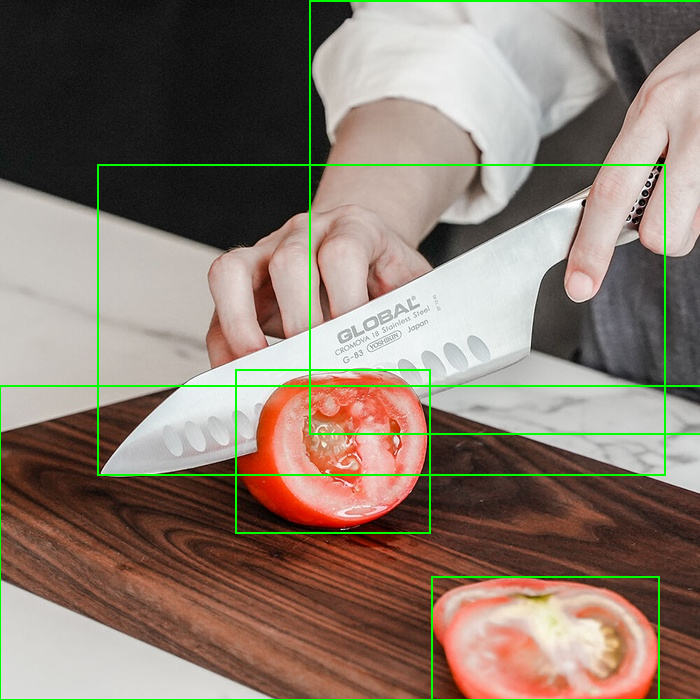

In [3]:
object_image = "object_detection_sample_01.jpg"
display(localize_objects(object_image))

### image sample - 02
#### [29cm] 발뮤다 New 더 스토리
#### https://product.29cm.co.kr/catalog/396529

#### 로고 인식

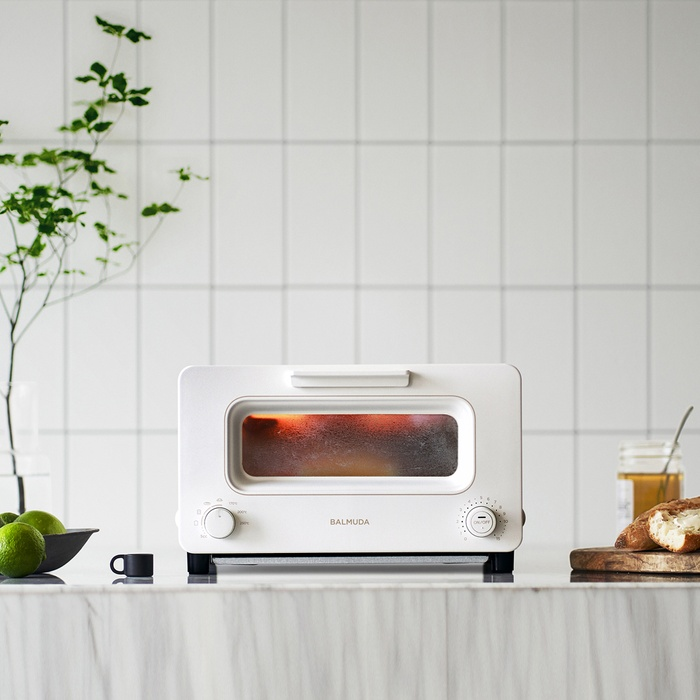

logo_annotations {
  mid: "/g/1yp37nrlp"
  description: "Balmuda"
  score: 0.82408464
  bounding_poly {
    vertices {
      x: 327
      y: 515
    }
    vertices {
      x: 372
      y: 515
    }
    vertices {
      x: 372
      y: 528
    }
    vertices {
      x: 327
      y: 528
    }
  }
}

Logos:
Balmuda


In [7]:
object_image = "object_detection_sample_02.jpg"
display(Image.open(object_image))
detect_logos(object_image)

### 라벨 인식

In [5]:
detect_labels(object_image)

label_annotations {
  mid: "/m/05s2s"
  description: "Plant"
  score: 0.922456861
  topicality: 0.922456861
}
label_annotations {
  mid: "/m/0h99cwc"
  description: "Kitchen appliance"
  score: 0.893544734
  topicality: 0.893544734
}
label_annotations {
  mid: "/m/03fp41"
  description: "Houseplant"
  score: 0.83104831
  topicality: 0.83104831
}
label_annotations {
  mid: "/m/0j62f"
  description: "Rectangle"
  score: 0.824391544
  topicality: 0.824391544
}
label_annotations {
  mid: "/m/019dx1"
  description: "Home appliance"
  score: 0.822511435
  topicality: 0.822511435
}
label_annotations {
  mid: "/m/0457gc6"
  description: "Material property"
  score: 0.800854087
  topicality: 0.800854087
}
label_annotations {
  mid: "/m/037xy"
  description: "Gas"
  score: 0.78088665
  topicality: 0.78088665
}
label_annotations {
  mid: "/m/03k2v"
  description: "Heat"
  score: 0.761372745
  topicality: 0.761372745
}
label_annotations {
  mid: "/m/03gq5hm"
  description: "Font"
  score: 0.760097

## 도전과제 : Gemini 1.5 Pro API로 같은 기능을 하도록 만들기